# **df2 - 2) Customer Feedback & Sentiment Dataset**

# **Description: Contains customer feedback, complaints, and sentiments extracted from reviews and social media.**

In [4]:
import pandas as pd
df2=pd.read_csv(r'/content/drive/MyDrive/Captsone project/Data/df2-customer_feedback_sentiment_dataset.csv')

In [5]:
df2.head()

,Unnamed: 0,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type
0,0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Neutral,1,Claim
1,1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim
2,2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Positive,2,Customer Support
3,3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim
4,4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Neutral,4,Claim


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1000 non-null   int64 
 1   Review_ID        1000 non-null   object
 2   Customer_ID      1000 non-null   object
 3   Review_Text      1000 non-null   object
 4   Sentiment_Label  1000 non-null   object
 5   Rating           1000 non-null   int64 
 6   Service_Type     1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [7]:
df2.isnull().sum()

,0
Unnamed: 0,0
Review_ID,0
Customer_ID,0
Review_Text,0
Sentiment_Label,0
Rating,0
Service_Type,0


In [8]:
df2.drop('Unnamed: 0',axis=1,inplace=True)
df2.head()

,Review_ID,Customer_ID,Review_Text,Sentiment_Label,Rating,Service_Type
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,23b8c1e9-3924-46de-beb1-3b9046685257,Beautiful instead ahead despite measure ago cu...,Neutral,1,Claim
1,12476f57-a5e5-45ab-aefc-fad8efc89849,88bd6407-2bcf-4e01-a28d-efe39bf00273,Left establish understand read. Range successf...,Neutral,3,Claim
2,cac5b68c-28f4-4481-a0a0-4dc427209bdf,10435a10-98ae-4334-ac12-ace8ae340454,Other life edge network wall quite. Race Mr en...,Positive,2,Customer Support
3,913e4de2-e0c5-4cb8-bda9-c2a90ed42f1a,bb5e4bcf-15ed-4269-9429-6c07f26b4776,Within mouth call process. Close month parent ...,Positive,5,Claim
4,dfde4fbf-3ff3-40bf-b66e-cb15474ebc19,ceda8bbb-7171-4434-934c-6c92ec5b227c,Anything yourself structure why. Coach magazin...,Neutral,4,Claim


In [9]:
# Identify categorical and numerical columns
categorical_columns = df2.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Review_ID', 'Customer_ID', 'Review_Text', 'Sentiment_Label', 'Service_Type']
Numerical Columns: ['Rating']


In [10]:
df2.nunique()

,0
Review_ID,1000
Customer_ID,1000
Review_Text,1000
Sentiment_Label,3
Rating,5
Service_Type,3


In [11]:
!pip install wordcloud matplotlib

# **Create wordcloud for categorical column for better Understanding**

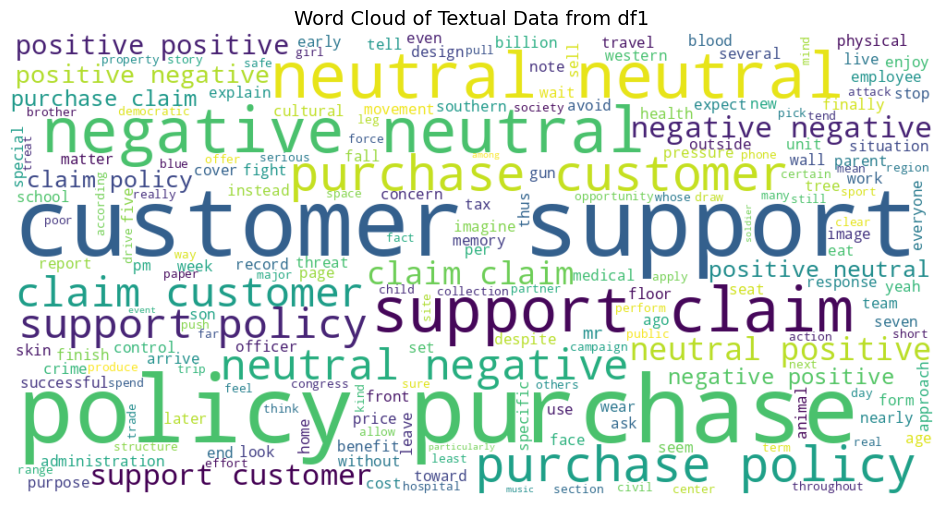

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load or create the DataFrame (df1 should already exist)
# If df1 is not created yet, you can generate it using the previous script

# Select only the text-based columns
text_columns = ['Review_Text', 'Sentiment_Label', 'Service_Type']

# Combine text data from all selected columns
# The change is in the following line: iterating over values in the series to create a list of strings
text_data = " ".join([str(value).lower() for col in text_columns for value in df2[col].dropna()])

# Generate the Word Cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide the axes
plt.title("Word Cloud of Textual Data from df1", fontsize=14)
plt.show()

# **Description: Contains customer feedback, complaints, and sentiments extracted from reviews and social media.**

# **Combined based Column Analysis**

In [13]:
df2.nunique()

,0
Review_ID,1000
Customer_ID,1000
Review_Text,1000
Sentiment_Label,3
Rating,5
Service_Type,3


In [14]:
df2['Service_Type'].value_counts()

,count
Service_Type,
Customer Support,339
Policy Purchase,335
Claim,326


# **Best Cross-Check Charts:**

Sentiment vs. Rating – Boxplot to analyze how ratings vary across sentiments.

Service Type vs. Rating – Boxplot to check service performance.

Sentiment Distribution – Count plot to visualize sentiment frequency.

Rating Distribution – Histogram to understand rating spread.

Customer Reviews Frequency – Bar plot to identify repeat reviewers.

# **1) Sentiment_Label vs. Rating**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df2['Sentiment_Label'].value_counts()

,count
Sentiment_Label,
Neutral,354
Negative,331
Positive,315


In [16]:
df2['Rating'].value_counts()

,count
Rating,
4,220
3,205
1,198
2,189
5,188


/tmp/ipython-input-3622395947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2["Sentiment_Label"], y=df2["Rating"], palette=palette)
/tmp/ipython-input-3622395947.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(x=df2["Sentiment_Label"], y=df2["Rating"], palette=palette)


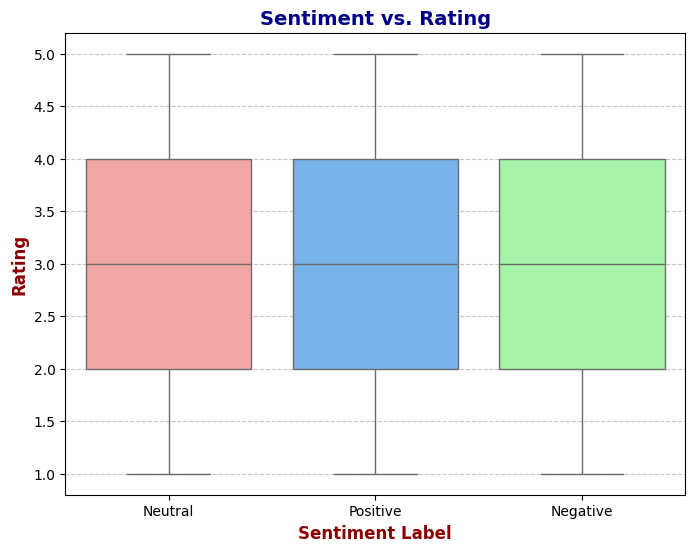

In [17]:
# Creating a colorful boxplot for Sentiment_Label vs. Rating
plt.figure(figsize=(8, 6))
palette = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99"]  # Custom color palette

sns.boxplot(x=df2["Sentiment_Label"], y=df2["Rating"], palette=palette)
plt.title("Sentiment vs. Rating", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Sentiment Label", fontsize=12, fontweight='bold', color='darkred')
plt.ylabel("Rating", fontsize=12, fontweight='bold', color='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Insights from the Box Plot (Sentiment vs. Rating):**

**Weak Positive Correlation:** While there's a trend suggesting that positive sentiment tends to be associated with slightly higher ratings, and negative sentiment with slightly lower ratings, the relationship isn't very strong.

**Significant Overlap:** The rating distributions for all three sentiment categories (positive, negative, and neutral) overlap considerably. This means you can't reliably predict a rating based on sentiment alone.


**Sentiment is Not Deterministic:**

**A positive sentiment** doesn't guarantee a high rating,

and a **negative sentiment** doesn't always lead to a low rating.

**Neutral Sentiment's** Variability: The neutral category shows a wide range of ratings, suggesting that neutral sentiment doesn't necessarily indicate a consistent level of satisfaction.

# **2) Service Type vs Rating**

In [18]:
df2['Service_Type'].value_counts()

,count
Service_Type,
Customer Support,339
Policy Purchase,335
Claim,326


/tmp/ipython-input-926886420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2["Service_Type"], y=df2["Rating"], palette=palette)
/tmp/ipython-input-926886420.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(x=df2["Service_Type"], y=df2["Rating"], palette=palette)


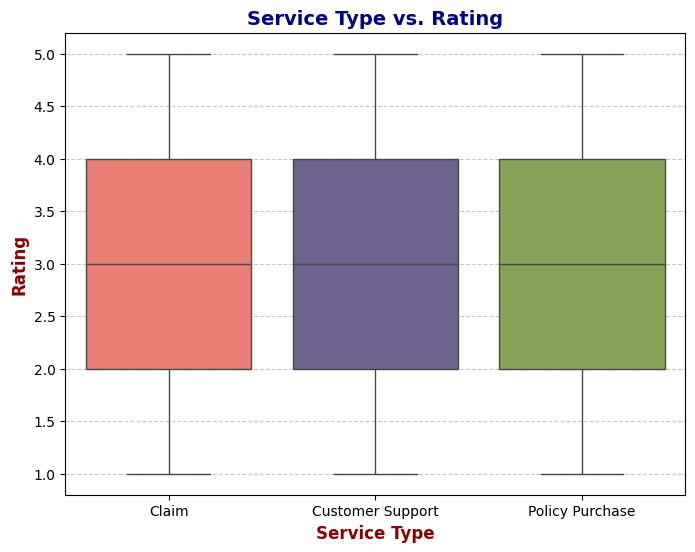

In [19]:
# Creating a colorful boxplot for Service_Type vs. Rating
plt.figure(figsize=(8, 6))
palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9"]  # Custom color palette

sns.boxplot(x=df2["Service_Type"], y=df2["Rating"], palette=palette)
plt.title("Service Type vs. Rating", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Service Type", fontsize=12, fontweight='bold', color='darkred')
plt.ylabel("Rating", fontsize=12, fontweight='bold', color='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Key Observations and Insights:**

**Overall Trend:**

Similar to the previous sentiment analysis, there's a trend, but it's not dramatically strong. The ratings for all three service types (Claim, Customer Support, and Policy Purchase) are relatively close.

**Claim Service Slightly Lower:**

**The "Claim" service type seems to have a slightly lower median rating compared to the other two**. This suggests that customers may be less satisfied with the claim process than with customer support or policy purchase.

**Customer Support and Policy Purchase Similar:**

The **distributions for "Customer Support" and "Policy Purchase" are very similar**, with overlapping boxes and medians. This indicates that customers generally rate these two services comparably.

# **3) Sentiment Distribution**

In [20]:
df2['Sentiment_Label'].value_counts()

,count
Sentiment_Label,
Neutral,354
Negative,331
Positive,315


/tmp/ipython-input-3482353466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df2["Sentiment_Label"], palette=palette)


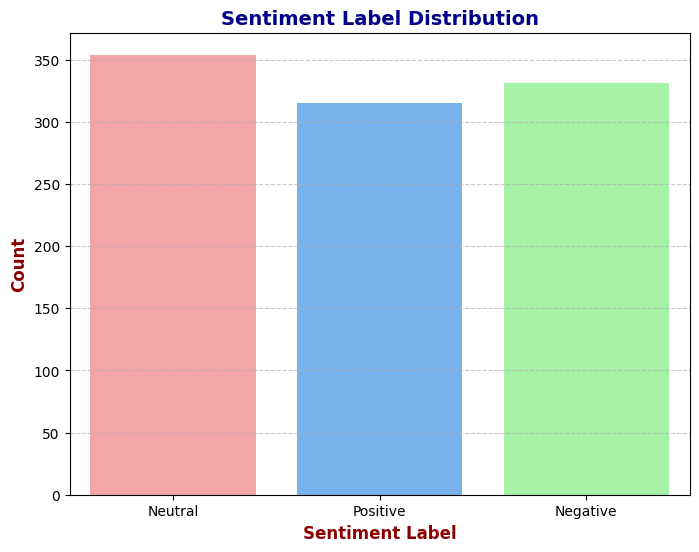

In [21]:
# Creating a countplot for Sentiment_Label
plt.figure(figsize=(8, 6))
palette = ["#FF9999", "#66B3FF", "#99FF99"]  # Custom color palette

sns.countplot(x=df2["Sentiment_Label"], palette=palette)
plt.title("Sentiment Label Distribution", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Sentiment Label", fontsize=12, fontweight='bold', color='darkred')
plt.ylabel("Count", fontsize=12, fontweight='bold', color='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Key Observations and Insights:**

**Neutral Dominance:** The **"Neutral" sentiment category has the highest count,** indicating a large portion of the data is classified as neutral.

**Comparable Positive and Negative:** The counts for "Positive" and "Negative" sentiments are relatively close, suggesting a similar level of positive and negative feedback.

**Imbalanced Distribution:** The distribution is somewhat imbalanced, with "Neutral" significantly higher than the other two.

**Potential for Further Analysis:** The high neutral count might warrant investigation into the reasons for neutrality (e.g., ambiguous language, mixed feelings).

# **4) Rating Distribution**

In [22]:
df2['Rating'].value_counts()

,count
Rating,
4,220
3,205
1,198
2,189
5,188


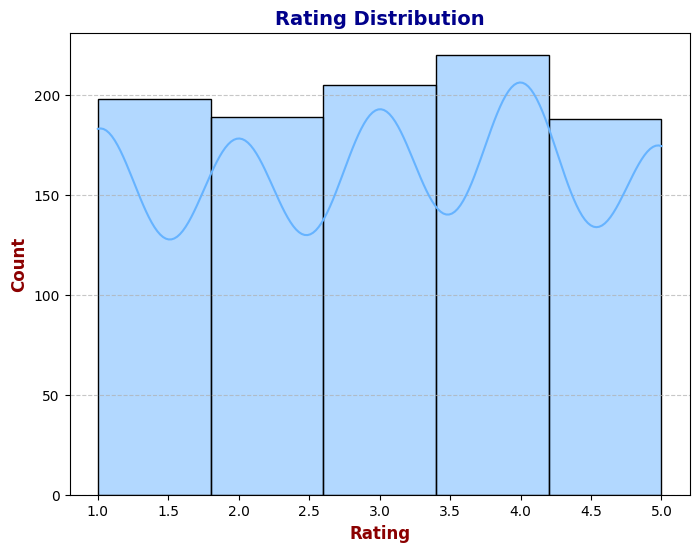

In [23]:
# Creating a histogram for Rating distribution
plt.figure(figsize=(8, 6))
sns.histplot(df2["Rating"], bins=5, kde=True, color="#66B3FF")

plt.title("Rating Distribution", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Rating", fontsize=12, fontweight='bold', color='darkred')
plt.ylabel("Count", fontsize=12, fontweight='bold', color='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Key Observations and Insights:**

**Relatively Uniform Distribution:**

The ratings are distributed relatively evenly across the **scale (1 to 5)**, with **no single rating dominating**.

**Slight Skew Towards Higher Ratings:**

There's a slight tendency towards **higher ratings (3.5 to 4.5)**, suggesting a **generally positive experience**.

**Presence of All Ratings:**

All rating values are represented, indicating a wide range of customer experiences.

# **5) Customer Reviews Frequency**

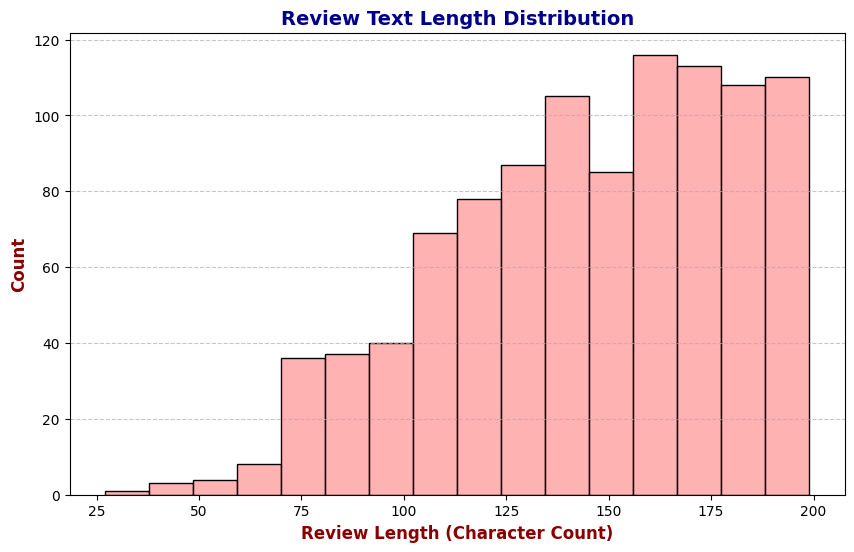

In [24]:
# Creating a bar plot for Review_Text length distribution

# Calculate review text lengths (assuming actual text data, but using a placeholder here)
df2["Review_Length"] = df2["Review_Text"].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df2["Review_Length"], color="#FF9999")

plt.title("Review Text Length Distribution", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Review Length (Character Count)", fontsize=12, fontweight='bold', color='darkred')
plt.ylabel("Count", fontsize=12, fontweight='bold', color='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Key Observations and Insights:**

**Right Skewed Distribution:**

The distribution is heavily right-skewed, indicating **most reviews have a higher character count.**

**Peak in Longer Reviews:**

The peak of the distribution is towards the right, suggesting a **common review length in the 150-200 character range.**

**Few Short Reviews:**

 There are relatively few reviews with very short character counts (below 75 characters).

**Variability in Length:**

There's a wide range of review lengths, from very short to relatively long.

**Potential for Detailed Feedback:**

The **prevalence of longer reviews suggests customers are willing to provide detailed feedback**.